# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

In [5]:
train

,id,keyword,location,text,target
1186,1707,bridge%20collapse,NaN,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,8257,rioting,NaN,Still rioting in a couple of hours left until ...,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [6]:
test

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
4307,6115,hellfire,"570 Vanderbilt; Brooklyn, NY",New cocktail on the list! El Diablo Mas Verde:...,0
3375,4833,evacuation,USA,Bend Post Office roofers cut gas line prompt e...,1
1710,2466,collided,NaN,Monsoon flooding - Monsoon rains have have hit...,1
4898,6973,massacre,Ireland,Remember this was a massacre of civilians. #Hi...,1


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [7]:
data.isna()

,id,keyword,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


In [8]:
data = data.fillna('')
data

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,,,Two giant cranes holding a bridge collapse int...,1
7609,10870,,,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,,,Police investigating after an e-bike collided ...,1


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


<Axes: xlabel='target', ylabel='count'>

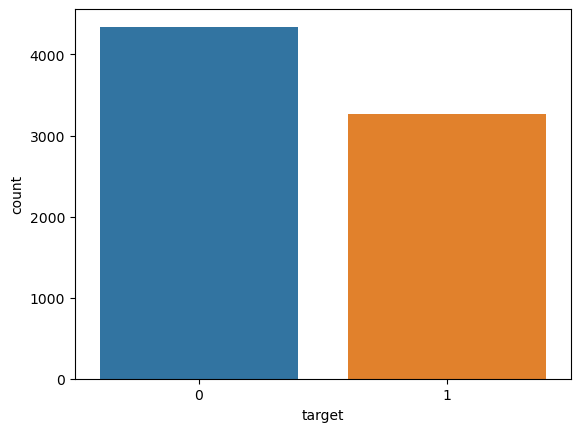

In [9]:
sns.countplot(data, x="target")

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [10]:
popular_keywords =  data.groupby(['keyword'])['keyword'].count().sort_values(ascending=False).head(10)
popular_keywords = pd.DataFrame({'keyword':popular_keywords.index, 'count':popular_keywords.values})
class_distr_kw = data.groupby(['keyword'])['target'].sum()
class_distr_kw = pd.DataFrame({'keyword':class_distr_kw.index, 'positives':class_distr_kw.values})
popular_keywords = popular_keywords.join(class_distr_kw.set_index('keyword'), on='keyword')
popular_keywords['negatives'] = popular_keywords['count'] - popular_keywords['positives']
popular_keywords['keyword'].values
data_popula_kw = data.loc[data['keyword'].isin(popular_keywords['keyword'].values)]
data_popula_kw

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,,,Two giant cranes holding a bridge collapse int...,1
7609,10870,,,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,,,Police investigating after an e-bike collided ...,1


c:\Users\ilya\Anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='keyword', ylabel='Count'>

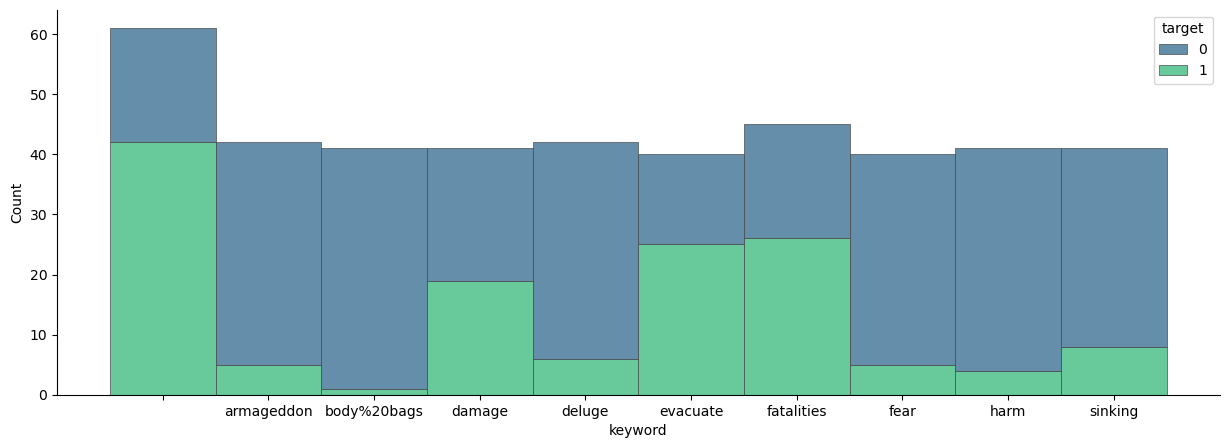

In [11]:
f, ax = plt.subplots(figsize=(15., 5))
sns.despine(f)

sns.histplot(
    data_popula_kw,
    x="keyword", hue="target",
    multiple="stack",
    palette="viridis",
    edgecolor=".3",
    linewidth=.5,
)
# plt.show()

**Выводы**: TODO

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [12]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,NaN,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [13]:
train_new = pd.DataFrame()
train_new['id'] = train['id']
train_new['str'] = train['keyword'].astype(str) + ' ' + train['location'].astype(str) + ' ' + train['text'].astype(str)
train_new['target'] = train['target']
test_new = pd.DataFrame()
test_new['id'] = test['id']
test_new['str'] = test['keyword'].astype(str) + ' ' + test['location'].astype(str) + ' ' + test['text'].astype(str)
test_new['target'] = test['target']

In [14]:
train_new.loc[[6590, 7122, 2769]]

,id,str,target
6590,9436,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,10203,violent%20storm nan If you were the NWS wth a ...,1
2769,3980,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer()
train_new_vec = pd.DataFrame(cnt_vec.fit_transform(train_new['str']).toarray(), columns=cnt_vec.get_feature_names_out())
train_new_vec

,00,000,0000,00cy9vxeff,00end,00pm,01,011072,014213,02,...,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûò800000,ûó,ûóher,ûókody,ûótech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
test

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
4307,6115,hellfire,"570 Vanderbilt; Brooklyn, NY",New cocktail on the list! El Diablo Mas Verde:...,0
3375,4833,evacuation,USA,Bend Post Office roofers cut gas line prompt e...,1
1710,2466,collided,NaN,Monsoon flooding - Monsoon rains have have hit...,1
4898,6973,massacre,Ireland,Remember this was a massacre of civilians. #Hi...,1


## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [17]:
from string import punctuation

def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    return any(char.isdigit() for char in s)

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    for p in punctuation:
        if p in s:
            return True
    return False

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return True if s[0] == '#' else False

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    return True if s[0] == '@' else False

def investigate_vocabulary(vocabulary):
    print('With digit:      ', sum([contains_digit(w) for w in vocabulary.keys()]))
    print('With punctuation:', sum([contains_punctuation(w) for w in vocabulary.keys()]))
    print('Hashtags:        ', sum([is_hashtag(w) for w in vocabulary.keys()]))
    print('Mentions:        ', sum([is_mention(w) for w in vocabulary.keys()]))

In [18]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [19]:
investigate_vocabulary(cnt_vec.vocabulary_)

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [20]:
train_new

,id,str,target
1186,1707,bridge%20collapse nan Ashes 2015: AustraliaÛª...,0
4071,5789,"hail Carol Stream, Illinois GREAT MICHIGAN TEC...",1
5461,7789,police Houston CNN: Tennessee movie theater s...,1
5787,8257,rioting nan Still rioting in a couple of hours...,1
7445,10656,wounds Lake Highlands Crack in the path where ...,0
...,...,...,...
5226,7470,obliteration Merica! @Eganator2000 There aren'...,0
5390,7691,panic nan just had a panic attack bc I don't h...,0
860,1242,blood nan Omron HEM-712C Automatic Blood Press...,0
7603,10862,nan nan Officials say a quarantine is in place...,1


In [21]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer
def tokenizer(text):
    tok = TweetTokenizer()
    return tok.tokenize(text)
twt_vec = CountVectorizer(tokenizer=tokenizer).fit(train_new['str'])
train_new_vec = pd.DataFrame(twt_vec.transform(train_new['str']).toarray(), columns=twt_vec.get_feature_names_out())
train_new_vec

c:\Users\ilya\Anaconda3\envs\ds\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,!,#,##youtube,#034,#039,#06,#09,#1-1st,#1008pla,#140,...,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûò800000,ûó,ûóher,ûókody,ûótech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
investigate_vocabulary(twt_vec.vocabulary_)

With digit:       3939
With punctuation: 7338
Hashtags:         1470
Mentions:         1679


**Сравнение:** TODO

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [23]:
from string import punctuation
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
latin_alphabet = 'abcdefghijklmnopqrstuvwxyz'

def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    for char in s.lower():
        if char not in latin_alphabet:
            return False
    return True

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    is_parantaces = False
    for char in s:
        if char not in punctuation:
            return False
        if char in [')', '('] :
            is_parantaces = True
    return is_parantaces

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    if s[0] == '#':
        return contains_only_latin_letters(s[1:])

def custom_tokenizer(s: str) -> List[str]:    
    # Кастомный токенайзер
    tok = TweetTokenizer()
    tokenized = tok.tokenize(s.lower())
    for i, token in enumerate(tokenized):
        if is_emoji(token) or is_hashtag(token):
            continue
        elif not contains_only_latin_letters(token) or token in stopwords:
            tokenized.pop(i)

    stemmer = SnowballStemmer("english")
    return [stemmer.stem(w) for w in tokenized]
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ilya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [25]:
for s in train_new[:5]['str']:
    print(custom_tokenizer(s))

['bridg', '20collaps', 'nan', 'ash', ':', 'australia', 'ûªs', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia', '60', 'http://t.co/t5trhjuau0']
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '@bmurph1019', '.', '#goblu', '#wrestleon']
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
['riot', 'nan', 'still', 'riot', 'a', 'coupl', 'hour', 'left', 'i', 'to', 'up', 'class']
['wound', 'lake', 'highland', 'crack', 'the', 'path', 'i', 'wipe', 'this', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee', 'http://t.co/yaqrsximph']


## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [59]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer).fit(train_new['str'])
X_train_new_vec_cust = pd.DataFrame(vectorizer.transform(train_new['str']).toarray(), columns=vectorizer.get_feature_names_out())
y_train = train_new['target'].reset_index(drop=True)

X_test_new_vec_cust = pd.DataFrame(vectorizer.transform(test_new['str']).toarray(), columns=vectorizer.get_feature_names_out())
y_test = test_new['target'].reset_index(drop=True)

c:\Users\ilya\Anaconda3\envs\ds\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [62]:
X_train_new_vec_cust

,!,#,#034,#039,#140,#163,#24,#263chat,#2minutemix,#4playthursday,...,ûïnew,ûïplan,ûïrichmond,ûïstretcher,ûïthe,ûïyou,ûò,ûó,ûóher,ûótech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
y_train

0       0
1       1
2       1
3       1
4       0
       ..
5324    0
5325    0
5326    0
5327    1
5328    1
Name: target, Length: 5329, dtype: int64

In [64]:
X_test_new_vec_cust

,!,#,#034,#039,#140,#163,#24,#263chat,#2minutemix,#4playthursday,...,ûïnew,ûïplan,ûïrichmond,ûïstretcher,ûïthe,ûïyou,ûò,ûó,ûóher,ûótech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y_test

0       1
1       0
2       1
3       0
4       0
       ..
2279    0
2280    1
2281    1
2282    1
2283    1
Name: target, Length: 2284, dtype: int64

2. Обучите LogisticRegression на полученных признаках.


In [66]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train_new_vec_cust, y_train)
y_pred = clf.predict(X_test_new_vec_cust)

3. Посчитайте метрику f1-score на тестовых данных.

In [67]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7544715447154471

## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer).fit(train_new['str'])
X_train_new_vec_cust_2 = pd.DataFrame(vectorizer.transform(train_new['str']).toarray(), columns=vectorizer.get_feature_names_out())
y_train_2 = train_new['target'].reset_index(drop=True)

X_test_new_vec_cust_2 = pd.DataFrame(vectorizer.transform(test_new['str']).toarray(), columns=vectorizer.get_feature_names_out())
y_test_2 = test_new['target'].reset_index(drop=True)

c:\Users\ilya\Anaconda3\envs\ds\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [69]:
X_train_new_vec_cust_2

,!,#,#034,#039,#140,#163,#24,#263chat,#2minutemix,#4playthursday,...,ûïnew,ûïplan,ûïrichmond,ûïstretcher,ûïthe,ûïyou,ûò,ûó,ûóher,ûótech
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5325,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5326,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5327,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
y_train_2

0       0
1       1
2       1
3       1
4       0
       ..
5324    0
5325    0
5326    0
5327    1
5328    1
Name: target, Length: 5329, dtype: int64

In [71]:
X_test_new_vec_cust_2

,!,#,#034,#039,#140,#163,#24,#263chat,#2minutemix,#4playthursday,...,ûïnew,ûïplan,ûïrichmond,ûïstretcher,ûïthe,ûïyou,ûò,ûó,ûóher,ûótech
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.389017,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [73]:
y_test_2

0       1
1       0
2       1
3       0
4       0
       ..
2279    0
2280    1
2281    1
2282    1
2283    1
Name: target, Length: 2284, dtype: int64

In [74]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train_new_vec_cust_2, y_train_2)
y_pred_2 = clf.predict(X_test_new_vec_cust_2)

In [75]:
from sklearn.metrics import f1_score
f1_score(y_test_2, y_pred_2)

0.7430786267995569

1. **Ответ:** Почти не изменилось

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9).fit(train_new['str'])
X_train_new_vec_cust_3 = pd.DataFrame(vectorizer.transform(train_new['str']).toarray(), columns=vectorizer.get_feature_names_out())
y_train_3 = train_new['target'].reset_index(drop=True)

X_test_new_vec_cust_3 = pd.DataFrame(vectorizer.transform(test_new['str']).toarray(), columns=vectorizer.get_feature_names_out())
y_test_3 = test_new['target'].reset_index(drop=True)

c:\Users\ilya\Anaconda3\envs\ds\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [77]:
X_train_new_vec_cust_3

,!,#,#034,#039,#140,#163,#24,#263chat,#2minutemix,#4playthursday,...,ûïnew,ûïplan,ûïrichmond,ûïstretcher,ûïthe,ûïyou,ûò,ûó,ûóher,ûótech
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5325,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5326,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5327,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train_new_vec_cust_3, y_train_3)
y_pred_3 = clf.predict(X_test_new_vec_cust_3)

In [79]:
f1_score(y_test_3, y_pred_3)

0.7430786267995569

2. **Ответ:** Ни то, ни другое не изменилось

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [84]:
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=0.01).fit(train_new['str'])
X_train_new_vec_cust_4 = pd.DataFrame(vectorizer.transform(train_new['str']).toarray(), columns=vectorizer.get_feature_names_out())
y_train_4 = train_new['target'].reset_index(drop=True)

X_test_new_vec_cust_4 = pd.DataFrame(vectorizer.transform(test_new['str']).toarray(), columns=vectorizer.get_feature_names_out())
y_test_4 = test_new['target'].reset_index(drop=True)

c:\Users\ilya\Anaconda3\envs\ds\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [85]:
X_train_new_vec_cust_4

,!,#new,',(,),-,.,...,/,20bag,...,world,would,wreck,year,york,you,your,,û,û_
0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0000,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5325,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.417456,0.0,0.0,0.0,0.0,0.0,0.0
5326,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5327,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train_new_vec_cust_4, y_train_4)
y_pred_4 = clf.predict(X_test_new_vec_cust_4)

In [89]:
f1_score(y_test_3, y_pred_3)

0.7430786267995569

3. **Ответ:** Качество не улучшилось

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [91]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000).fit(train_new['str'])
X_train_new_vec_cust_5 = vectorizer.transform(train_new['str'])
y_train_5 = train_new['target'].reset_index(drop=True)

X_test_new_vec_cust_5 = vectorizer.transform(test_new['str'])
y_test_5 = test_new['target'].reset_index(drop=True)

clf = LogisticRegression(random_state=42)
clf.fit(X_train_new_vec_cust_5, y_train_5)
y_pred_5 = clf.predict(X_test_new_vec_cust_5)

print(f'F1 score: {f1_score(y_test_5, y_pred_5)}')

F1 score: 0.7236403995560488


2. Какой из подходов показал самый высокий результат?

2. **Ответ:** CountVectorizer + Logistic regression